Trabalho 

In [1]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prep2b import DataPreparation
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
prep = DataPreparation()

train_db = pd.read_csv("dataset/train_radiomics_hipocamp.csv")
test_db = pd.read_csv("dataset/test_radiomics_hipocamp.csv")
control_db = pd.read_csv("dataset/train_radiomics_occipital_CONTROL.csv")

train_db = prep.prep_train(train_db)
test_db = prep.transform(test_db)
control_db = prep.transform(control_db)

In [3]:
train_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 382 entries, diagnostics_Image-original_Mean to Transition
dtypes: float64(381), object(1)
memory usage: 910.4+ KB


In [4]:
test_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 381 entries, diagnostics_Image-original_Mean to Age
dtypes: float64(381)
memory usage: 297.8 KB


In [5]:
X = train_db.drop(columns=["Transition"]) 
y = train_db["Transition"]  

In [6]:
X_train = pd.read_csv('prep2b/train_X.csv')
X_test = pd.read_csv('prep2b/test_X.csv')
y_train = pd.read_csv('prep2b/train_y.csv')
y_test = pd.read_csv('prep2b/test_y.csv')

Fitting 10 folds for each of 24 candidates, totalling 240 fits


/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

Melhores parâmetros encontrados: {'gb__learning_rate': 0.3, 'gb__n_estimators': 50, 'rf__max_depth': 3, 'rf__n_estimators': 100, 'svc__C': 0.1, 'svc__kernel': 'linear'}
F1 Score médio com validação cruzada: 0.3574727765392054


/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tiagogr/miniconda3/envs/DAA/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Matriz de Confusão:


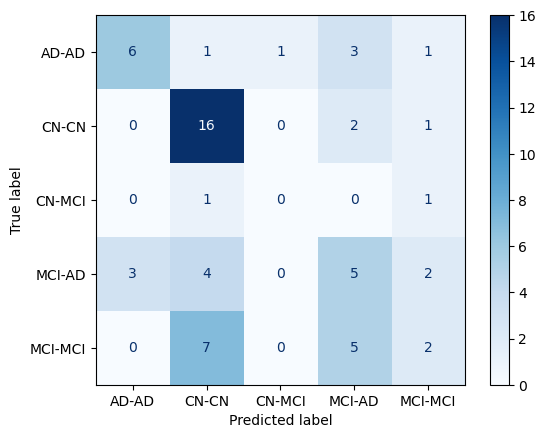


Relatório de Classificação:
              precision    recall  f1-score   support

       AD-AD       0.67      0.50      0.57        12
       CN-CN       0.55      0.84      0.67        19
      CN-MCI       0.00      0.00      0.00         2
      MCI-AD       0.33      0.36      0.34        14
     MCI-MCI       0.29      0.14      0.19        14

    accuracy                           0.48        61
   macro avg       0.37      0.37      0.35        61
weighted avg       0.45      0.48      0.44        61



In [7]:
clf1 = RandomForestClassifier(random_state=2024)
clf2 = GradientBoostingClassifier(random_state=2024)
clf3 = SVC(probability=True, random_state=2024)

ensemble = VotingClassifier(
    estimators=[
        ('rf', clf1),
        ('gb', clf2),
        ('svc', clf3),
    ],
    voting='soft'  
)

# Configurando o GridSearchCV
param_grid = {
    'rf__n_estimators': [100],  # Parâmetros para o Random Forest
    'rf__max_depth': [3,5],
    'svc__C': [0.1],         # Parâmetros para o SVC
    'svc__kernel': ['linear','sigmoid','poly'],
    'gb__n_estimators': [50,100],  # Parâmetros para o Gradient Boosting
    'gb__learning_rate': [0.1,0.3],
}

cv_strategy = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(
    estimator=ensemble,
    param_grid=param_grid,
    scoring='f1_macro',  
    cv=cv_strategy,
    verbose=1,
    refit=True,
    n_jobs=8
)

grid_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados:", grid_search.best_params_)
best_model = grid_search.best_estimator_

print("F1 Score médio com validação cruzada:", grid_search.best_score_)

best_model.fit(X_train, y_train)

# Avaliando no conjunto de teste
y_pred = best_model.predict(X_test)

print("Matriz de Confusão:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


F1-Score no conjunto de controle: 0.22399727604675843


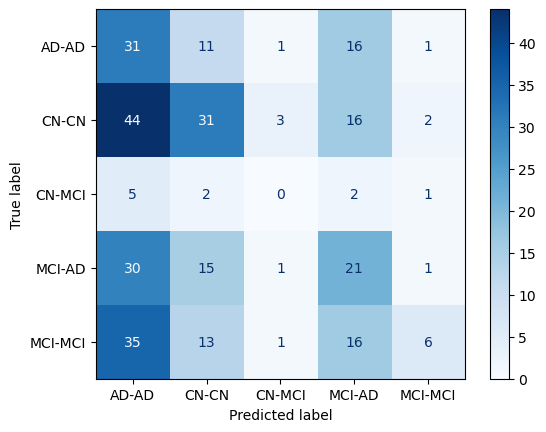


Relatório de Classificação no conjunto de controle:
              precision    recall  f1-score   support

       AD-AD       0.21      0.52      0.30        60
       CN-CN       0.43      0.32      0.37        96
      CN-MCI       0.00      0.00      0.00        10
      MCI-AD       0.30      0.31      0.30        68
     MCI-MCI       0.55      0.08      0.15        71

    accuracy                           0.29       305
   macro avg       0.30      0.25      0.22       305
weighted avg       0.37      0.29      0.28       305



In [8]:
CX = control_db.drop(columns=["Transition"]) 
Cy = control_db["Transition"]  

control_pred = best_model.predict(CX)

control_f1_score = f1_score(Cy, control_pred, average='macro')
print("F1-Score no conjunto de controle:", control_f1_score)

# Matriz de Confusão
ConfusionMatrixDisplay.from_predictions(Cy, control_pred, cmap='Blues')
plt.show()

# Relatório de Classificação
print("\nRelatório de Classificação no conjunto de controle:")
print(classification_report(Cy, control_pred))


### Guardar o melhor modelo do random forest

In [9]:
best_model.fit(X, y)
test_predictions = best_model.predict(test_db)

row_ids = range(1, len(test_predictions) + 1)

output_df = pd.DataFrame({
    "RowId": row_ids,
    "Result": test_predictions
})


output_df.to_csv("resultados/mv2b.csv", index=False)